In [1]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Create a Model Class that inharit nn.Module

class Model (nn.Module):
	# Input layer (Input features)
	# Hidden layer 1 (number of nueuron)
	# Hidden layer 2 
	# Output Layer (Number of classes)

	def __init__(self, input_features = 4 ,hidden_1 = 8, hidden_2 = 9, output_features = 3):
		super().__init__()  # instantiate our nn.Module
		self.f_connected1 = nn.Linear(input_features,hidden_1)
		self.f_connected2 = nn.Linear(hidden_1,hidden_2)
		self.output = nn.Linear(hidden_2,output_features)
	
	def forward(self,x):
		x = F.relu(self.f_connected1(x))
		x = F.relu(self.f_connected2(x))
		x = self.output(x)

		return x
	


In [3]:
# Pick a manual seed for Randomization
torch.manual_seed(41)
# Create an Model instance
model = Model()


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# Change last column form strings to integers
my_df['species'] = my_df['species'].replace('setosa',0.0)
my_df['species'] = my_df['species'].replace('versicolor',1.0)
my_df['species'] = my_df['species'].replace('virginica',2.0)
my_df

C:\Users\chira\AppData\Local\Temp\ipykernel_29480\3918365836.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica',2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [7]:
# Train Test Split
from sklearn.model_selection import train_test_split
X = my_df.drop('species',axis=1).values # (numpy arrays)
y = my_df['species'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=41)


In [8]:
# Convert X features to fload tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [9]:
# Convert y labels to fload tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [10]:
# Set the Criterion of model to measure the error, how far of the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Set the Optimizer of model to update the weights, how to update the model to minimize the error
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [11]:
model.parameters

<bound method Module.parameters of Model(
  (f_connected1): Linear(in_features=4, out_features=8, bias=True)
  (f_connected2): Linear(in_features=8, out_features=9, bias=True)
  (output): Linear(in_features=9, out_features=3, bias=True)
)>

In [12]:
# Train our model
epochs = 100
losses = []
for epoch in range(epochs):
	# Forward pass and get prediction
	y_pred = model.forward(X_train)
	loss = criterion(y_pred,y_train)
	losses.append(loss.detach().numpy())
	if epoch % 10 == 0:
		print(f'Epoch {epoch} and loss is: {loss}')
	optimizer.zero_grad()
	loss.backward()
	optimizer.step()

Epoch 0 and loss is: 1.1251550912857056
Epoch 10 and loss is: 1.0096259117126465
Epoch 20 and loss is: 0.8157405257225037
Epoch 30 and loss is: 0.585706353187561
Epoch 40 and loss is: 0.3999636471271515
Epoch 50 and loss is: 0.26768800616264343
Epoch 60 and loss is: 0.17942363023757935
Epoch 70 and loss is: 0.12151691317558289
Epoch 80 and loss is: 0.0860118493437767
Epoch 90 and loss is: 0.06520850956439972


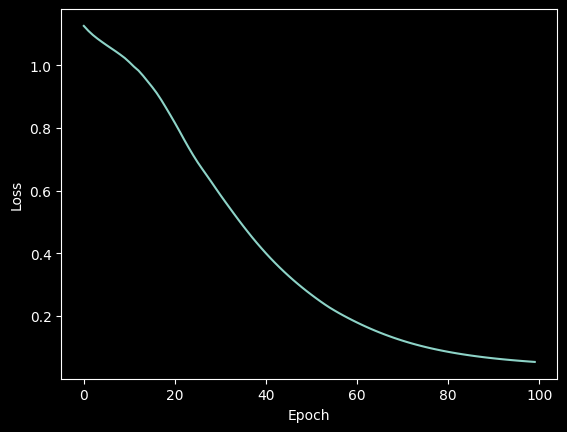

In [13]:
# Graph it out
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


In [14]:
# Validate our model
with torch.no_grad():
	y_val = model.forward(X_test)
	loss = criterion(y_val,y_test)

In [15]:
loss

tensor(0.1315)

In [16]:
correct = 0
with torch.no_grad():
	for i,data in enumerate(X_test):
		y_val = model.forward(data)
		print(f'{i+1}.) {str(y_val)} {y_test[i]}')
		if y_val.argmax().item() == y_test[i]:
			correct += 1

1.) tensor([-5.8760,  4.4628,  6.5124]) 2
2.) tensor([-7.5436,  4.1670,  9.7255]) 2
3.) tensor([-8.4504,  5.1271, 10.1987]) 2
4.) tensor([-4.3398,  5.6267,  2.5608]) 1
5.) tensor([-7.1825,  4.8754,  8.2992]) 2
6.) tensor([-3.3974,  5.3463,  1.2803]) 1
7.) tensor([-5.9231,  4.9822,  5.9997]) 2
8.) tensor([-4.2881,  5.7003,  2.3889]) 1
9.) tensor([-6.5356,  4.9257,  7.1260]) 2
10.) tensor([-8.0509,  4.4129, 10.3286]) 2
11.) tensor([-5.6762,  4.9500,  5.6215]) 2
12.) tensor([ 4.5662, -2.2476, -2.8911]) 0
13.) tensor([ 4.2571, -1.9967, -2.7330]) 0
14.) tensor([-2.1108,  4.0515,  0.5799]) 1
15.) tensor([ 3.4575, -1.2098, -2.3514]) 0
16.) tensor([-5.4724,  5.1165,  5.0934]) 2
17.) tensor([ 4.0557, -1.7949, -2.6492]) 0
18.) tensor([-5.8075,  4.6053,  6.2458]) 1
19.) tensor([ 4.4343, -2.1392, -2.8242]) 0
20.) tensor([ 3.4528, -1.2514, -2.3660]) 0
21.) tensor([-2.6189,  4.5619,  0.8574]) 1
22.) tensor([-7.7412,  4.7377,  9.4199]) 2
23.) tensor([ 3.5744, -1.3221, -2.4135]) 0
24.) tensor([ 4.5365

In [17]:
correct

28

In [18]:
new_iris = torch.tensor([4.7,3.2,1.3,0.2])

In [19]:
with torch.no_grad():
	print(model(new_iris))
	print(model(new_iris).argmax().item())

tensor([ 4.5365, -2.2383, -2.8684])
0


In [20]:
new_iris = torch.tensor([5.9,3.0,5.1,1.8])
with torch.no_grad():
	print(model(new_iris))
	print(model(new_iris).argmax().item())

tensor([-5.9944,  4.5077,  6.6792])
2


In [21]:
# Save our NN Model

torch.save(model.state_dict(),'IrisDatasetModel.pt')

In [22]:
# Load the Save Model

new_model = Model()
new_model.load_state_dict(torch.load('IrisDatasetModel.pt'))

C:\Users\chira\AppData\Local\Temp\ipykernel_29480\1380406762.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('IrisDatasetModel.pt'))

<All keys matched successfully>

In [23]:
# Make sure it load correctly

new_model.eval()

Model(
  (f_connected1): Linear(in_features=4, out_features=8, bias=True)
  (f_connected2): Linear(in_features=8, out_features=9, bias=True)
  (output): Linear(in_features=9, out_features=3, bias=True)
)

In [24]:
new_iris = torch.tensor([5.9,3.0,5.1,1.8])
with torch.no_grad():
	print(new_model(new_iris))
	print(new_model(new_iris).argmax().item())

tensor([-5.9944,  4.5077,  6.6792])
2
